In [1]:
import os
os.chdir("C:/Users/pitak/Desktop/DigitalHuman-Speak")
import script.util.TextProcessingUtil as tpu
import script.util.VoiceProcessingUtil as vpu
import speech_recognition as sr
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
%matplotlib inline

จิรา kawana


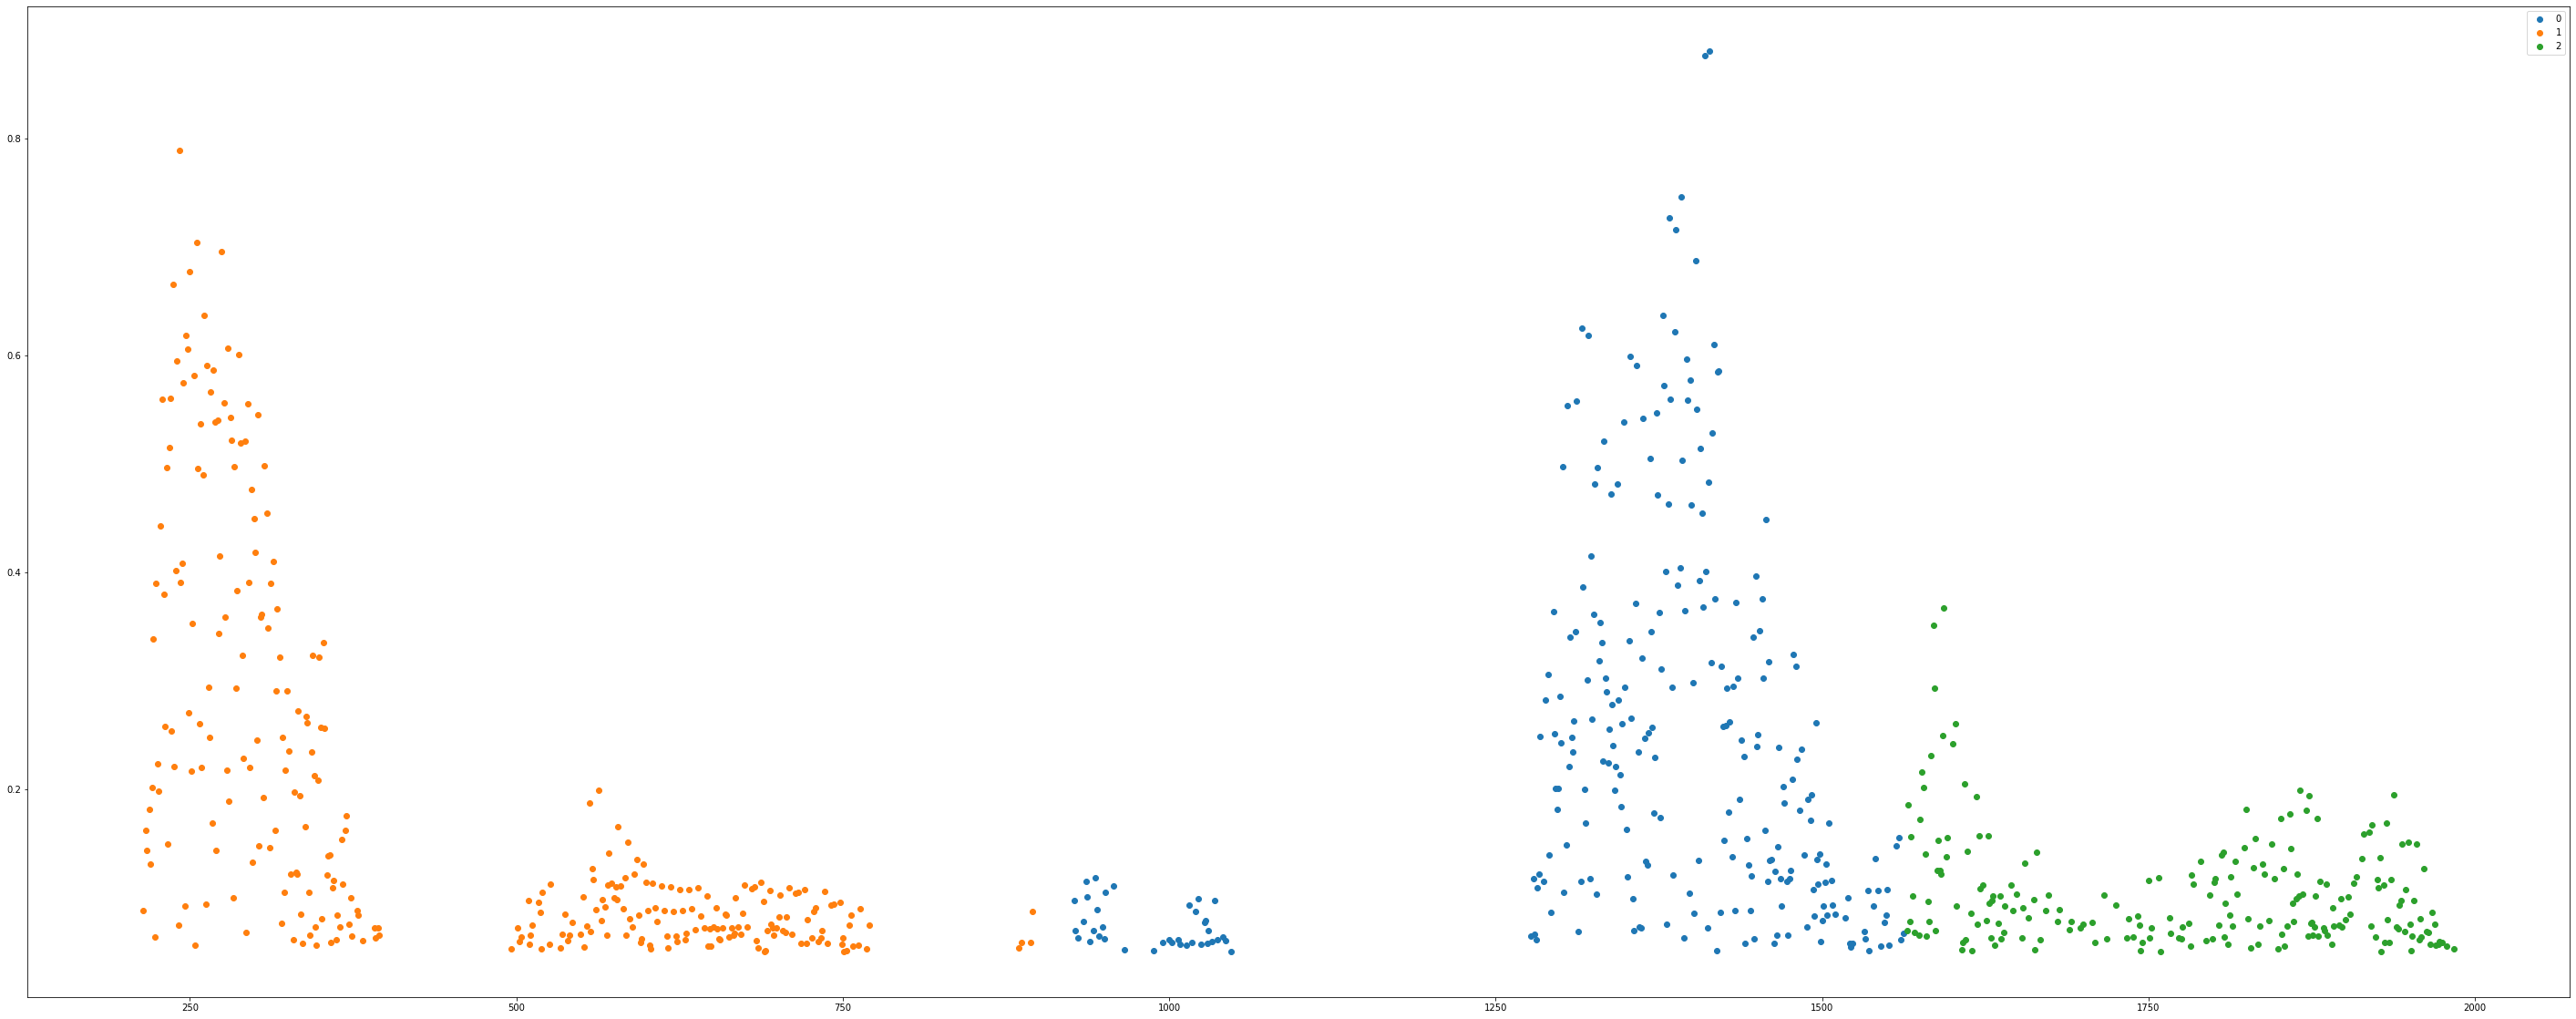

<Figure size 432x288 with 0 Axes>

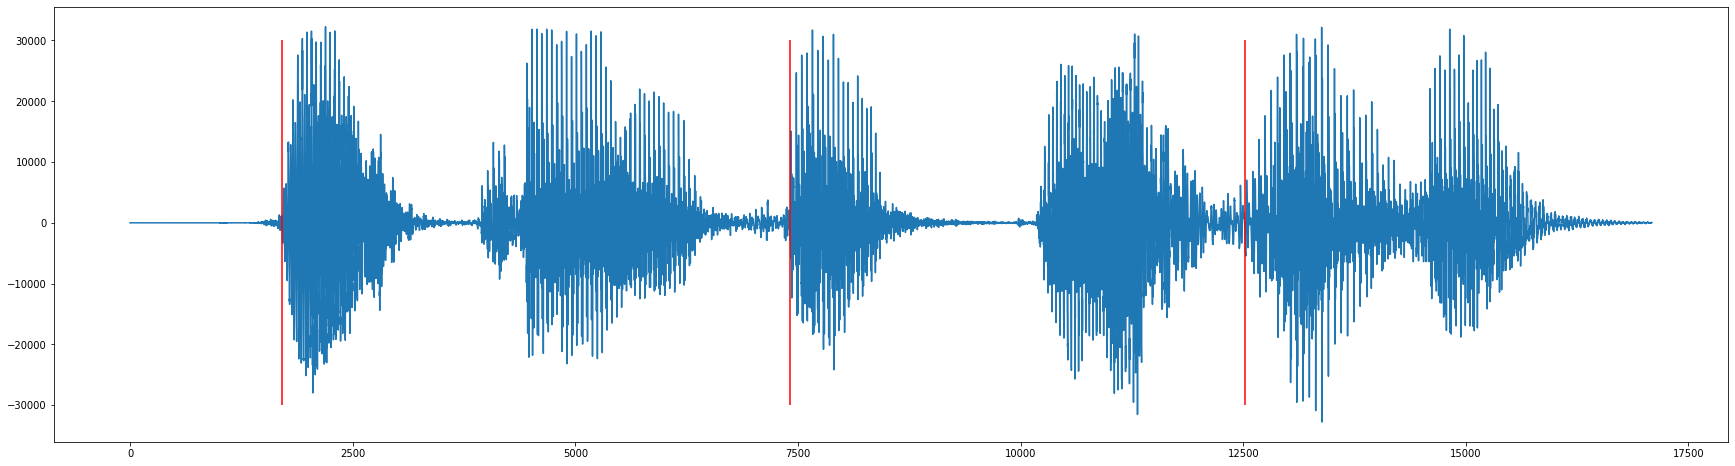

[[214, 895], [927, 1562], [1565, 1984]]

<Figure size 432x288 with 0 Axes>

In [20]:
# vpu.get_voice_syllables("data/Test/dontworry.wav",from_file=True)
vpu.get_voice_syllables(from_file=True,audio_path="data/Test/jrllw.wav")

In [ ]:
PATH = "data\Test\dontworry.wav"

In [ ]:
data, Fs = librosa.load(PATH, sr=1000)

In [ ]:
recog = sr.Recognizer()
speech = sr.AudioFile(PATH)
with speech as source:
    audio = recog.listen(source)
text = recog.recognize_google(audio,language='th')
print(text)

In [ ]:
syls = tpu.get_text_syllables(text=text)
syls

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(data)
plt.show()

In [ ]:
cut = 0.0
newdata = [i if (i > cut) else 0 for i in abs(data)]

In [ ]:
abs(data)

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(newdata)
plt.show()

In [ ]:
cluster_data = []
for i in range(len(newdata)):
    if newdata[i] > 0.05:
        cluster_data.append([i,newdata[i]])
cluster_data  = np.array(cluster_data)
cluster_data

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters=len(syls), 
    n_init=20,
    max_iter=6900,
    random_state=690,
    # algorithm="full"
    )
label = model.fit_predict(cluster_data)

In [ ]:
u_labels = np.unique(label)
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
clusters = []
for i in u_labels:
    clusters.append([int(cluster_data[label == i , 0].min()),int(cluster_data[label == i , 0].max())])
clusters = sorted(clusters)
clusters

In [ ]:
evaFs,evawav = wav.read(PATH)

In [ ]:
c = clusters[0]
e = clusters[14]
wav.write("d.wav",evaFs,evawav[c[0]*int(evaFs/Fs):e[1]*int(evaFs/Fs)])